## UNIT 12 지하철 시간대별 데이터 시각화하기

In [15]:
import csv
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

plt.rc('font', family='Malgun Gothic')
plt.rcParams['axes.unicode_minus']=False

In [13]:
# 예시삼아 pandas로 출력한 csv 파일
# 작업일시 데이터는 구글 스프레드시트로 삭제
pd.read_csv('subwaytime.csv')

,사용월,호선명,역ID,지하철역,04:00:00~04:59:59,Unnamed: 5,05:00:00~05:59:59,Unnamed: 7,06:00:00~06:59:59,Unnamed: 9,...,23:00:00~23:59:59,Unnamed: 43,00:00:00~00:59:59,Unnamed: 45,01:00:00~01:59:59,Unnamed: 47,02:00:00~02:59:59,Unnamed: 49,03:00:00~03:59:59,Unnamed: 51
0,NaN,NaN,NaN,NaN,승차,하차,승차,하차,승차,하차,...,승차,하차,승차,하차,승차,하차,승차,하차,승차,하차
1,2021-03,1호선,1.0,서울역,668,19,"9,048","5,684","11,314","32,628",...,"9,712","7,559",9,487,0,0,0,0,0,0
2,2021-03,1호선,10.0,동묘앞,73,1,"2,888",815,"3,453","4,739",...,"1,164","2,317",2,"1,127",1,2,0,0,0,0
3,2021-03,1호선,2.0,시청,20,0,"1,722","3,784","2,707","18,444",...,"3,716","1,242",2,72,0,0,0,0,0,0
4,2021-03,1호선,3.0,종각,147,1,"2,181","4,199","2,947","21,373",...,"6,368","1,341",17,149,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
602,2021-03,우이신설선,708.0,북한산보국문,0,0,"1,914",556,"6,583","2,227",...,889,"4,555",0,4,0,0,0,0,0,0
603,2021-03,우이신설선,709.0,정릉,2,1,"1,820",454,"4,992","1,681",...,481,"2,121",1,5,0,0,0,0,0,0
604,2021-03,우이신설선,710.0,성신여대입구(돈암),0,0,779,342,"1,240","1,008",...,992,"1,376",0,14,0,0,0,0,0,0
605,2021-03,우이신설선,711.0,보문,0,0,401,286,724,"1,151",...,425,744,0,12,0,0,0,0,0,0


In [16]:
# 출근 시간대 사람들이 가장 많이 타고 내리는 역 찾기
# cp949 인코딩에 에러가 나는 관계로 UTF-8로 인코딩
f = open('subwaytime.csv',encoding='UTF-8')
data = csv.reader(f)
next(data)
next(data)
passengers = 0 # 역에 들어오는 사람의 수
maximum_station = 0 # 역에 들어오는 사람의 수가 가장 많은 역
for row in data :
    # 파이썬 코딩으로 쉼표 직접 제거한 후 map() 함수 적용
    for i in range(4,len(row)):
        row[i] = row[i].replace(',','')
    # 시간대 승하차 인원에 해당되는 값을 모두 정수 타입으로 변환
    row[4:] = map(int, row[4:])
    if sum(row[10:15:2]) > passengers :
        passengers = sum(row[10:15:2]) # 승하차 인원 갱신
        maximum_station = row[1] + ' ' + row[3] + '역'
print(maximum_station, '(' + str(passengers) + '명)')
f.close()

2호선 신림역 (688692명)


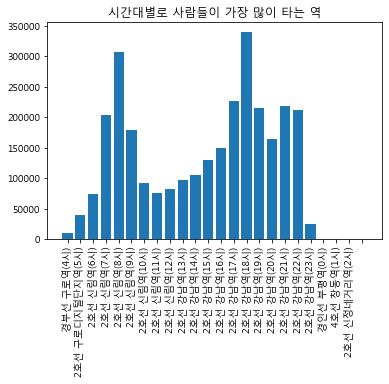

In [30]:
# 시간대별로 사람들이 가장 많이 타고 내리는 역 찾아 그래프로 그리기
f = open('subwaytime.csv',encoding='UTF-8')
data = csv.reader(f)
next(data)
next(data)
in_people = [int(a1) for a1 in '0' * 24]
in_the_station = [a3 for a3 in ' ' * 24]
for row in data :
    for i in range(4,len(row)):
        row[i] = row[i].replace(',','')
    # 시간대 승차 인원에 해당되는 값을 모두 정수 타입으로 변환
    row[4:] = map(int, row[4:])
    for j in range(24) : 
        # index에서 2를 곱하고 4를 더한 값이 csv 파일 내 시간별 승차 인원
        if row[j * 2 + 4] > in_people[j] :
            in_people[j] = row[j * 2 + 4] # 승차 인원 갱신
            # csv 파일의 승차 집계 시간이 4시부터 시작이므로 이에 맞춰 표현
            if j < 20 : 
                in_the_station[j] = row[1] + ' ' + row[3] + '역' + '(' + str(j + 4) + '시)'
            else : 
                in_the_station[j] = row[1] + ' ' + row[3] + '역' + '(' + str(j - 20) + '시)'
plt.title('시간대별로 사람들이 가장 많이 타는 역')
plt.rc('font', family='Malgun Gothic')
plt.bar(range(24), in_people)
plt.xticks(range(24), in_the_station, rotation = 90)
plt.show()

f.close()

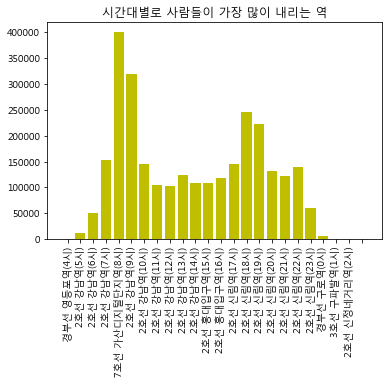

In [33]:
# 시간대별로 사람들이 가장 많이 내리는 역 찾아 그래프로 그리기
f = open('subwaytime.csv',encoding='UTF-8')
data = csv.reader(f)
next(data)
next(data)
out_people = [int(a2) for a2 in '0' * 24]
out_the_station = [a4 for a4 in ' ' * 24]
for row in data :
    for i in range(4,len(row)):
        row[i] = row[i].replace(',','')
    # 시간대 하차 인원에 해당되는 값을 모두 정수 타입으로 변환
    row[4:] = map(int, row[4:])
    for j in range(24) : 
        # index에서 2를 곱하고 5를 더한 값이 csv 파일 내 시간별 하차 인원
        if row[j * 2 + 5] > out_people[j] :
            out_people[j] = row[j * 2 + 5] # 하차 인원 갱신
            # csv 파일의 하차 집계 시간이 4시부터 시작이므로 이에 맞춰 표현
            if j < 20 : 
                out_the_station[j] = row[1] + ' ' + row[3] + '역' + '(' + str(j+ 4) + '시)'
            else : 
                out_the_station[j] = row[1] + ' ' + row[3] + '역' + '(' + str(j - 20) + '시)'
plt.title('시간대별로 사람들이 가장 많이 내리는 역')
plt.rc('font', family='Malgun Gothic')
plt.bar(range(24), out_people, color = 'y')
plt.xticks(range(24), out_the_station, rotation = 90)
plt.show()

f.close()

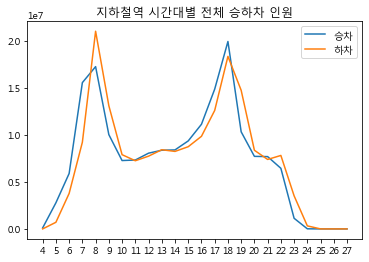

In [37]:
# 모든 지하철역에서 시간대별 전체 승하차 인원 찾아 그래프로 그리기
f = open('subwaytime.csv',encoding='UTF-8')
data = csv.reader(f)
next(data)
next(data)
in_people = [int(a1) for a1 in '0' * 24]
out_people = [int(a2) for a2 in '0' * 24]
for row in data :
    for i in range(4,len(row)):
        row[i] = row[i].replace(',','')
    # 시간대 승하차 인원에 해당되는 값을 모두 정수 타입으로 변환
    row[4:] = map(int, row[4:])
    # 시간당 각 역의 승하차 인원의 값을 모두 더하기
    for j in range(24) : 
        in_people[j] += row[j * 2 + 4]
        out_people[j] += row[j * 2 + 5]

plt.title('지하철역 시간대별 전체 승하차 인원')
plt.rc('font', family='Malgun Gothic')
plt.plot(in_people, label = '승차')
plt.plot(out_people, label = '하차')
plt.legend()
plt.xticks(range(24), range(4,28))
plt.show()

f.close()